# Lab 8: Mathematical modelling - model estimation
In this tutorial, we will walk through different steps of linear regression modeling introduced in the lecture. We will be working on __The World Happiness Dataset__ from Kaggle website:<br>
https://www.kaggle.com/unsdsn/world-happiness <br>
You will need to modify and combine these steps into several functions for the Assignment.<br>

<font color = 'red'> To do the assignment, use the lecture notes and the tutorial notebook!

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as so
import pandas as pd
import numpy as np 

## Import the dataset

In [3]:
# we will be workin on the dataset from 2019
df = pd.read_csv("2019.csv")

In [4]:
df.head()
print(df.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


## Relationship between Happiness score and other variables
Here, like in Lab07, we will take a look at the relationship between __Happiness Score__ and __Healthy life expectancy__, except for this tutorial, I have added data for a ficitonal country, _Zubrowka_ from _Grand Budapest Hotel_ movie, which is going to be the outlier in the data.<br>
Do the scatter plot and you'll see the data for this country!

Text(0.5, 0, 'Healthy life expectancy')

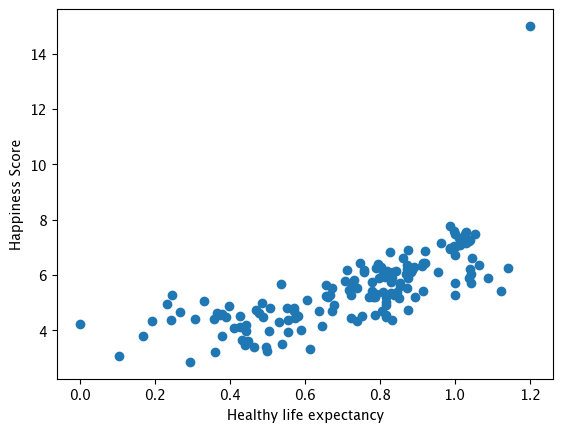

In [8]:
plt.scatter(df['Healthy life expectancy'], df['Score'])
plt.ylabel("Happiness Score")
plt.xlabel("Healthy life expectancy")

## 1. Simple Linear Regression
Here, I will introduce a new loss function!

### Simple linear regression using RSS as the loss function
Use the functions from the previous assignment to fit a simple linear regression model to the data using RSS as the loss function!<br>
You need to write the fitting function so that it takes flexible input as the loss function! For the tutorial, I am writting a fitting function with the loss function hard-coded. But remember to modify the fitting function so that it takes in flexible input as the loss function!

In [12]:
# Prediction Function
def simpleRegPredict(b, x):
    yp = b[0] + b[1] * x
    return yp

# The loss function
def simpleRegLossRSS(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y - predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0] = -2*sum(res)
    deriv[1] = -2*sum(res*x)
    return rss, deriv

# Plotting the function
def plotPrediction(b, x, y, predfcn):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x,y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = predfcn(b, xp)
    ax.plot(xp, yp, 'r')

# Function to find the best model
def simpleRegFitRSS(x, y):
    b0 = [np.mean(y), 0]
    RES = so.minimize(simpleRegLossRSS, b0, args=(x,y), jac=True)
    print(RES)
    b = RES.x
    plotPrediction(b, x, y, simpleRegPredict)
    res = y - np.mean(y)
    TSS = sum(res**2)
    RSS, grad = simpleRegLossRSS(b, x, y)
    R2 = 1-RSS/TSS # The larger the R2, the better the model
    return (R2, b)

In [10]:
y = df['Score']
x = df['Healthy life expectancy']

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 135.6208640570613
        x: [ 2.566e+00  3.985e+00]
      nit: 5
      jac: [ 3.197e-14  2.842e-14]
 hess_inv: [[ 3.167e-02 -3.911e-02]
            [-3.911e-02  5.370e-02]]
     nfev: 7
     njev: 7


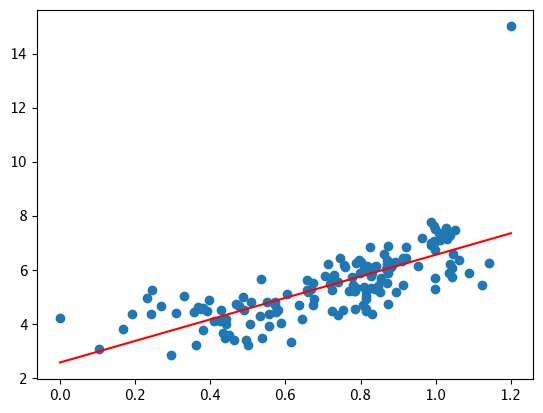

In [ ]:
r2, b = simpleRegFitRSS(x, y)
# "fun" means the minimum of the RSS

### Making the regression robust to outliers
To make the regression robust to this outlier datapoint, you will need to use a different loss function: L1 - the absolute deviation. As the name implies, the function calculate the residuals (deviation of the predicted values from the real/observed values), takes the absolute of the residua;s and calculate their sum. Follow the same steps as before:<br>
1. use your prediction function to calculate the predicted values
2. calculate the residuals
3. Get the absolute value of the residuals
4. Calculate the sum <br>

All the above steps are similar to the steps in the RSS loss function, except for 3!<br>

### Calculating the derivatives for L1 loss function (follow the lecture notes)
Your function should also return the derivative array. The derivative for the L1 loss function is calculated differently. Check out the following link to get familiar with how to take the derivative from a function with abs operator (Check out the Derivative section):<br>
https://en.wikipedia.org/wiki/Absolute_value <br>
To make sense of the derivative of the abs of a function, you also need to be familiar with the __sign__ function:<br>
https://en.wikipedia.org/wiki/Sign_function <br>

To implement the sign function in python, use numpy sign function: <br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html <br>

Use the lecture notes to see the formulas you need to implement for the derivatives and plug them into your code!<br>
Following is just an illustration of how numpy sign function works!

In [18]:
toy_y = np.array([0, 1, 2, 3, 4, 5, 6])
toy_yp = np.array([0.25, 1.5 , 2, 4.5, 4.75, 4.5, 5.8])
toy_res = toy_y - toy_yp

print(toy_res)
toy_sgn = np.sign(toy_res)
print(toy_sgn)

[-0.25 -0.5   0.   -1.5  -0.75  0.5   0.2 ]
[-1. -1.  0. -1. -1.  1.  1.]


### Not Successful message for L1 loss function
You won't be able to run the following line of code unless you have written the function to calculate L1 loss function!<br>
Pay attention to the Jacobian array, message, and success!

In [ ]:
B0 = np.zeros(2)
RES = so.minimize(simpleRegLossL1, B0, args=(x,y), jac=True)

<font color = 'orange'> As you can see, the `RES.success` field is __False__ and `RES.message` says: _Desired error not necessarily achieved due to precision loss_. If you are seeing this message, that is probably because the L1 loss function is not differentiable at it's minimum. So the algorithms that use the derivatives (gradients) to minimize this loss function might fail to come out successfully. If you see this message, you can ignore it for now and leave all your functions as they are. OR if you are curious to see how you can solve it, set _jac_ = __False__, modify the L1 loss function so that the dderivatives are calculated but not returned, and then use the documentation for scipy.optimize.minimize to see what are the different options for _method_ and try them out!

### Calculating R2 for model fitting using L1 function
R2 is defined as: R2 = 1 - (RSS/TSS). To get the value for R2, you will need to calculate RSS which is __Residuals sums of squares__. So use the parameters estimated using the SAD loss function and calculate RSS like you did in Assignment 7.

TypeError: mean() missing 1 required positional argument: 'a'

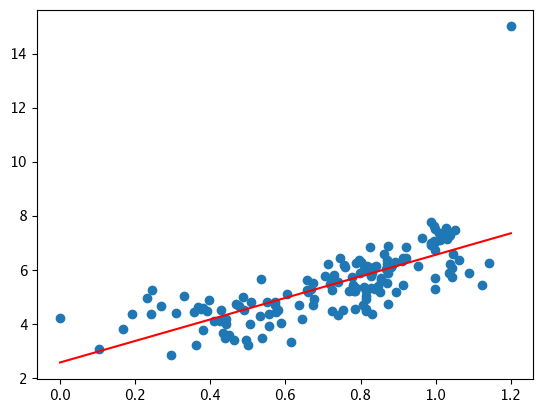

In [24]:
b = RES.x
plotPrediction(b, x, y, simpleRegPredict)

res = y - np.mean()
TSS = sum(res**2)

RSS, grad = simpleRegLossL1(b, x, y)
print(RSS)
R2 = 1 - RSS/TSS

## 2. Nonlinear (polynomial) Regression
In this part of the tutorial, we will be using the position salary dataset (position_salaries.csv). We will model the relationship between years of experience and salary.
For the tutorial, I will show you how to implement a polynomial regression with 3 parameters (yp = b0 + b1*x + b2*x^2). For the assignment, make sure you have made necessary changes so that your functions implement regression for any polynomial!

### Fitting a 3rd degree polynomial 
We will modify the functions from the last assignment to fit a 3rd degree polynomial to the data. Remember, for the assignment, your functions need to work for all polynomials, not just 3rd degree!<br>
For a 3rd degree polynomial, I need to implement this formula:<br>
yp = b0 + (b1 * x) + (b2 * x ** 2) + (b3 * x ** 3)<br>
This formula can also be re-written as:<br>
yp = (b0 * x ** 0) + (b1 * x ** 1) + (b2 * x ** 2) + (b3 * x ** 3)<br>

We will need a for loop to calculate all the terms and add them together to get the final predicted value:

In [25]:
"""
def simpleRegPredict(b, x):
    yp = b[0] + b[1] * x
    return yp
"""

def polyRegPredict(b, x):
    yp = np.zeros(x.shape)
    for i in range(4):
        yp += b[i] * np.power(x, i)

    return yp

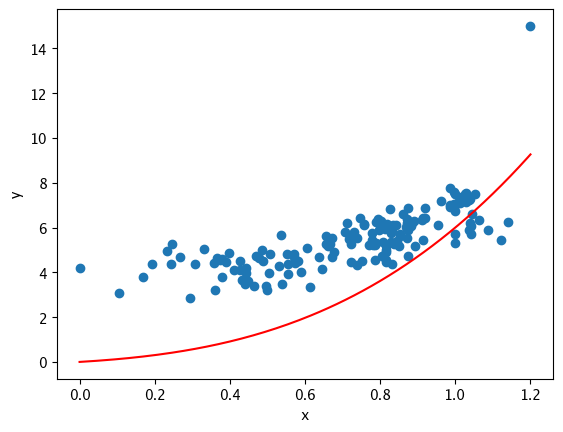

In [27]:
y = df["Score"]
x = df['Healthy life expectancy']
b = [0, 1, 2, 3]

xp = np.linspace(np.min(x), np.max(x), len(x))
yp = polyRegPredict(b, xp)

# Scatter plot
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

plt.plot(xp, yp, color = 'red')

### Writting the RSS loss function for a 3rd degree polynomial
Again, we are trying to write the __Residuals sums of squares__ loss function, which is the sum of the residuals squared!<br>
I will show the steps you need to implement to write a loss function for a nonlinear (polynomial) regression. Again, I will write the function to implement the loss function for 3rd degree polynomial. Make sure you make the necessary changes so that your function works for all the polynomialsa and put all the steps into one function!

#### 1. use the prediction function to get the predicted values

In [28]:
y = df['Score']
x = df['Healthy life expectancy']

yp = polyRegPredict(b, x)
yp

0      5.806148
1      5.944176
2      6.400690
3      6.371489
4      5.986011
         ...   
152    1.369756
153    0.762780
154    0.130523
155    0.546067
156    9.264000
Name: Healthy life expectancy, Length: 157, dtype: float64

#### 2. Get the residuals

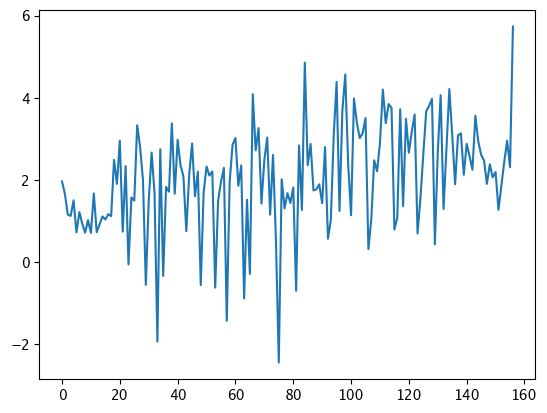

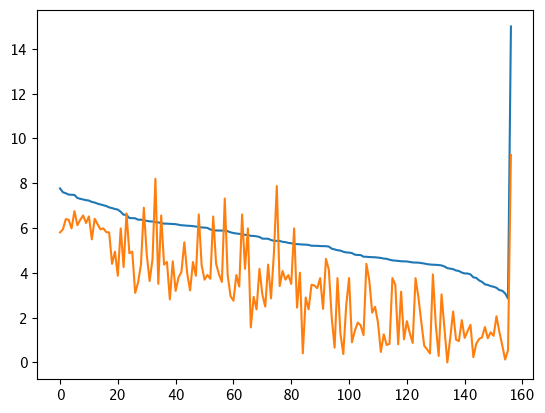

In [29]:
res = y - yp
plt.plot(res)
plt.show()

plt.plot(y)
plt.plot(yp)
plt.show()

#### 3. initialize the derivatives array

In [30]:
deriv = np.zeros(4) """ did we do derivatives, L1 loss function"""

#### 4. Fill in the derivative elements using a for loop
The elements of the derivative array should be filled in using a for loop. Taking the partial derivatives, you'll get the following formula for the derivative in respect to each of the parameters: 
* deriv0: derivative in respect to b0: -2 * sum( x^0 * res)
    * keep in mind that x^0 = 1
* deriv1: derivative in respect to b1: -2 * sum( x^1 * res)
* deriv2: derivative in respect to b2: -2 * sum( x^2 * res)
* deriv3: derivative in respect to b3: -2 * sum( x^3 * res) 

Can you find a relationship between the power of x and the parameter index?<br>


## 3. Cross validation
In this part of the tutorial, we are going to implement k-fold (with k = 10) cross validation and fit 3rd degree polynomials to the data. In the assignment, you will need to implement __leave one out cross validation__ which is a specific case of k-fold cross validation! You can use the code for k-fold cross validation to implement leave one out cross validation OR you can write your own code for leave one out!<br>
How many folds we have in __leave one out cross validation?__

The pseudo-code for k-fold cross validation is:
* split the dataframe into k folds
* loop over all the folds and in each iteration:
    * use k - 1 folds as the training dataset to estimate the parameters (b) of the model
    * use one fold as the test dataset. Use b to predict the values for the test dataset and build the complete array of predicted y values (yp)
* calculate RSScv using yp
* calculate TSS = sum(y - np.mean(y))
* calculate R2cv
* calculate R2

Again, you won't be able to follow this part of the tutorial as it uses functions that you need to define within the assignment

### 3.1 split the dataset into k folds
we use numpy array_split to split the dataset into k = 10 folds. Check out the documentation:<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_split.html

In [32]:
ind = np.arange(len(df.index))

folds = np.array_split(ind, 10)

#### Do some type and shape checking to make sense of the "folds" variable

In [36]:
print(type(folds))
print(len(folds))
print(type(folds[1]))
print(folds[0])

<class 'list'>
10
<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


### 3.2 Initialize the predicted y array
In each iteration, you will be using one fold for testing and the remaining folds for training the model, aka estimating the parameters! Once you estimate the parameters using the training set, you will use them to predict the y values for the testing set. Remember that the testing set was not used in parameter estimation! <br>
In each iteration, you will be using the testing set to predict a part of the predicted values. That's why you need to initialize the predicted values array.

In [37]:
yp_cv = np.zeros(len(df.index))
yp_cv

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### 3.3 Loop through folds and each time set one fold aside for testing
First you need to create a copy of the "folds" variable, because in the loop you will be playing around with the folds variable, each time deleting one element of the array.<br>
We will be using numpy.concatenate to create the indices for training set:<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html <br>

I will show how one iteration of the loop will be, You will need to put it into a loop.

In [45]:
import numpy as np

def cross_validate(df, folds, polyRegFit, o=polyRegPredict, order=3):
    yp_cv = np.zeros(len(df)) ## array to store predicted values

    for f in range(len(folds)):
        test_ind = folds[f]
        train_ind = np.concatenate([fold for i, fold in enumerate(folds) if i != f], axis = 0)
        \n 

        # Get test and train data
        df_test = df.loc[test_ind]
        df_train = df.loc[train_ind]

        # Extract features and target variables
        xtrain = df_train['Healthy life expectancy'].values
        ytrain = df_train['Score'].values
        xtest = df_test['Healthy life expectancy'].values

        _, b, _ = polyRegFit(xtrain, ytrain, order=order, fig=False) # False means initializetion does not happen

        # predict on the test set
        yp_cv[test_ind] = polyRegPredict(b, xtest)

        return yp_cv
    
    yp_cv = cross_validate(df, folds, polyRegFit, polyRegPredict, order=3)
    yp_cv # should output an array

### 3.4 Calculate cross validated R2
use the yp_cv to calculate R2cv

In [47]:
TSS = sum((y - y.mean()**2))
# Cross validated RSSS
RSScv = sum((y - yp)**2)

# Corss validated R2
R2cv = 1 - RSScv/TSS
print(R2cv) # should be 0.4

1.238799341025207


### 3.5 Calculate R2
Forget about the cross validation for a moment, fit a model to the whole dataset, and calculate R2

In [49]:
r, b, ax = polyRegFit(x, y, order=3, fig=False)
yp = polyRegPredict(b, x)

TSS = sum((y - y.mean())**2)
RSS = sum((y - yp)**2)
R2 = 1- RSS/TSS
print("R2 = %f" %R2)

NameError: name 'polyRegFit' is not defined